**MC-CULLOCH ANDNOT**

In [2]:
import numpy as np

class McCullochPitts:
    def __init__(self, input_size):
        self.weights = np.zeros(input_size)
        self.bias = 0

    def predict(self, inputs):
        return int(np.dot(self.weights, inputs) + self.bias >= 0)

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
expected_outputs = np.array([0, 0, 1, 0])

nn = McCullochPitts(2)
learning_rate = 0.1
epochs = 10

for _ in range(epochs):
    for input, expected_output in zip(inputs, expected_outputs):
        prediction = nn.predict(input)
        error = expected_output - prediction
        nn.weights += learning_rate * error * input
        nn.bias += learning_rate * error

for input in inputs:
    print(f"Inputs: {input}\nANDNOT output: {'True' if nn.predict(input) == 1 else 'False'}")


Inputs: [0 0]
ANDNOT output: False
Inputs: [0 1]
ANDNOT output: False
Inputs: [1 0]
ANDNOT output: True
Inputs: [1 1]
ANDNOT output: False


# **ACTIVATIONS**

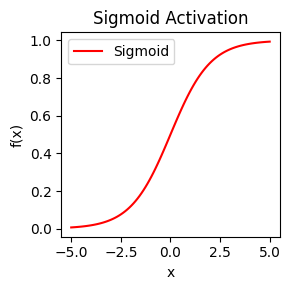

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def softmax(x):
    ex = np.exp(x - np.max(x))
    return ex / ex.sum()

x = np.linspace(-5, 5, 100)

y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)
y_softmax = softmax(x)

plt.figure(figsize=(3,3))
plt.plot(x, y_sigmoid, 'r-', label='Sigmoid')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Sigmoid Activation')
plt.legend()
plt.tight_layout()
plt.show()

# **4 even-odd**

In [5]:

training_data = {
    48: 0,  # '0' is even
    49: 1,  # '1' is odd
    50: 0,  # '2' is even
    51: 1,  # '3' is odd
    52: 0,  # '4' is even
    53: 1,  # '5' is odd
    54: 0,  # '6' is even
    55: 1,  # '7' is odd
    56: 0,  # '8' is even
    57: 1   # '9' is odd
}

def perceptron(input_value):
    return 0 if input_value % 2 == 0 else 1

test_data = [48, 49, 50, 51, 52, 53, 54, 55, 56, 57]

for ascii_val in test_data:
    number = chr(ascii_val)
    prediction = perceptron(ascii_val)
    parity = "even" if prediction == 0 else "odd"
    print(f"Number: {number}, ASCII value: {ascii_val}, Output: {parity}.")


Number: 0, ASCII value: 48, Output: even.
Number: 1, ASCII value: 49, Output: odd.
Number: 2, ASCII value: 50, Output: even.
Number: 3, ASCII value: 51, Output: odd.
Number: 4, ASCII value: 52, Output: even.
Number: 5, ASCII value: 53, Output: odd.
Number: 6, ASCII value: 54, Output: even.
Number: 7, ASCII value: 55, Output: odd.
Number: 8, ASCII value: 56, Output: even.
Number: 9, ASCII value: 57, Output: odd.


# **BAM**

In [6]:
import numpy as np
x1 = np.array([1,1,1,0,0])
x2 = np.array([0,0,1,1,1])
y1 = np.array([1,0,0])
y2 = np.array([0,1,0])

w = np.zeros((len(x1),len(y1)))
for i in range(len(x1)):
    for j in range(len(y1)):
        w[i][j] = x1[i]*y1[j] + x2[i]*y2[j]

def BAM(input_vector):
    output_vector = np.zeros(len(y1))
    for j in range(len(y1)):
        sum = 0
        for i in range(len(x1)):
            sum += input_vector[i] * w[i][j]
            output_vector[i]=sum
            return output_vector

input_vector=x1
output_vector =  BAM(input_vector)
print("input vector",input_vector )
print("output vector",output_vector)


input vector [1 1 1 0 0]
output vector [1. 0. 0.]


# **HOPFIELD**

In [7]:
import numpy as np

v1=np.array([1,-1,1,-1])
v2=np.array([-1,1,-1,1])
v3=np.array([1,1,-1,-1])
v4=np.array([-1,-1,1,1])

w=np.outer(v1,v1)+np.outer(v2,v2)+np.outer(v3,v3)+np.outer(v4,v4)
np.fill_diagonal(w,0)

def activation(x):
  return np.where(x>=0,1,-1)

def hopfield(input_vector,weight_matrix,activation_function,iterations):
  state=input_vector
  for i in range(iterations):
    net_input=np.dot(weight_matrix,state)
    new_state=activation_function(net_input)
    if np.array_equal(new_state,state):
      return new_state
    state=new_state
  return state

input_vector=np.array([1,-1,-1,1])
output_vector=hopfield(input_vector,w,activation,10)
print("input vector:", input_vector )
print("output vector:",output_vector)
print(w)

input vector: [ 1 -1 -1  1]
output vector: [ 1 -1 -1  1]
[[ 0  0  0 -4]
 [ 0  0 -4  0]
 [ 0 -4  0  0]
 [-4  0  0  0]]


# **ART(IRTPU)**

In [8]:
import numpy as np

class ART:
    def __init__(self, input_size, rho, alpha):      #rho:controls the degree of similarity between a new input pattern and the existing learned patterns.
        self.W = np.ones((1, input_size))
        self.rho = rho
        self.alpha = alpha
        self.input_size = input_size

    def reset(self):
        self.W = np.ones((1, self.input_size))

    def train(self, x):
        if self.predict(x) is not None:self.update(x)

    def predict(self, x):
        return x.dot(self.W.T) if x.dot(self.W.T) >= self.rho else None

    def update(self, x):
        self.W = self.alpha * x + (1 - self.alpha) * self.W

if __name__ == '__main__':
    input_size, rho, alpha = 2, 0.9, 0.1

    network = ART(input_size, rho, alpha)
    x1, x2, x3 = np.array([0.7, 0.3]), np.array([0.2, 0.8]), np.array([0.6, 0.6])
    for x in [x1, x2, x3]:network.train(x)
    print(network.W)


[[0.8637 0.8853]]


## **5  Graph**  (ifp)

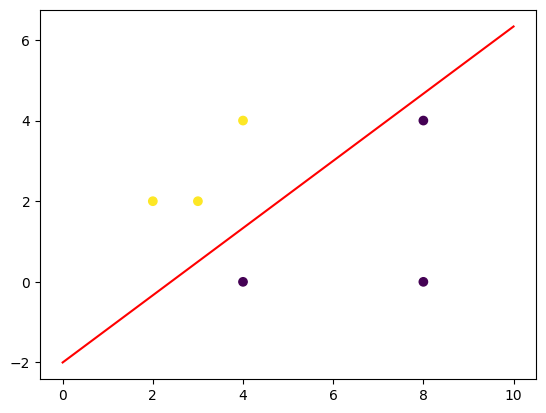

In [9]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, lr=0.1,iterations=100):
        self.lr, self.iterations, self.weights, self.bias = lr,iterations, None, None

    def fit(self, X, y):
        self.weights, self.bias = np.zeros(X.shape[1]), 1
        for _ in range(self.iterations):
            for j in range(X.shape[0]):
                if np.sign(np.dot(X[j], self.weights) + self.bias) != y[j]:
                    self.weights += self.lr * y[j] * X[j]
                    self.bias += self.lr * y[j]

    def predict(self, X):
        return np.sign(np.dot(X, self.weights) + self.bias)

X, y = np.array([[2, 2], [4, 4], [4, 0], [3, 2], [8, 4], [8, 0]]), np.array([1, 1, -1, 1, -1, -1])
model = Perceptron()
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(np.linspace(0, 10), -(model.weights[0]*np.linspace(0, 10) + model.bias)/model.weights[1], '-r') #eqn for plotting y axis
plt.show()
# In the graph, the decision boundary plotted by the perceptron is a straight line. This means that the perceptron algorithm is only capable of separating classes that are linearly separable in the input feature space


In [10]:
import numpy as np
class ART:
  def __init__(self,input_size,rho,alpha):
    self.w=np.ones((1,input_size))
    self.input_size=input_size
    self.rho=rho
    self.alpha=alpha

  def reset(self):
    self.w=np.ones((1,self.input_size))

  def train(self,x):
    if self.predict(x) is not None:self.update(x)

  def predict(self,x):
    return x.dot(self.w.T) if x.dot(self.w.T)>=self.rho else None

  def update(self, x):
    self.w= self.alpha * x + (1 - self.alpha) * self.w


if __name__ == '__main__':
  input_size,rho,alpha=2,0.9,0.1

  network=ART(input_size,rho,alpha)
  x1,x2,x3=np.array([0.7, 0.3]), np.array([0.2, 0.8]), np.array([0.6, 0.6])
  for x in [x1,x2,x3]:network.train(x)
  print(network.w)



[[0.8637 0.8853]]
